# DS-GA 3001.009 Modeling Time Series Data

# Week 6 ARMA Application

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import warnings
import itertools
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Part I: Data Loading

"Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.," which collected CO2 samples from March 1958 to December 2001. 

Reference: http://cdiac.ess-dive.lbl.gov/trends/co2/sio-keel-flask/sio-keel-flaskmlo_c.html

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data
y.head(10)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9
1958-05-31,NaN


Impute NaN

In [3]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

y.head(10)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01    313.425000
1958-11-01    313.425000
1958-12-01    314.700000
Freq: MS, Name: co2, dtype: float64

Plot the data.

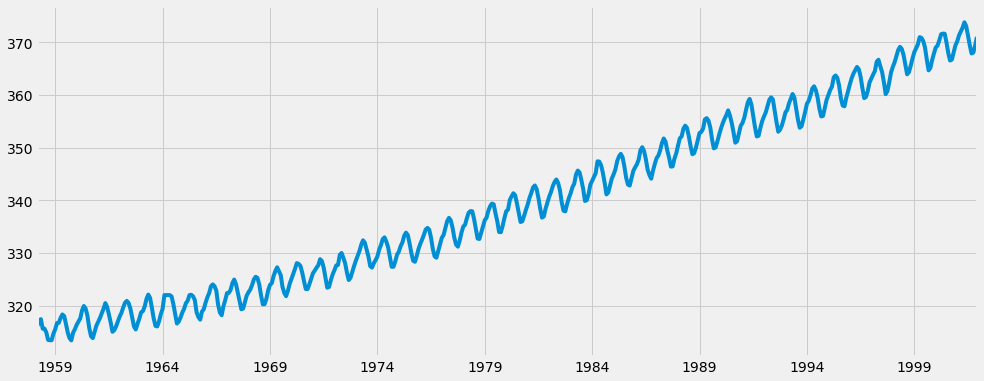

In [6]:
y.plot(figsize=(15, 6))
plt.show()

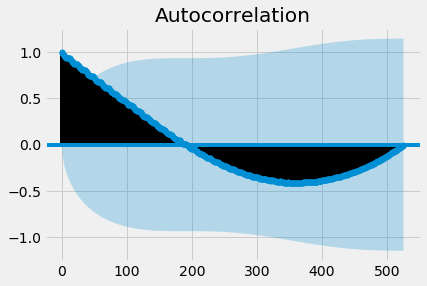

In [5]:
statsmodels.graphics.tsaplots.plot_acf(y)
plt.show()

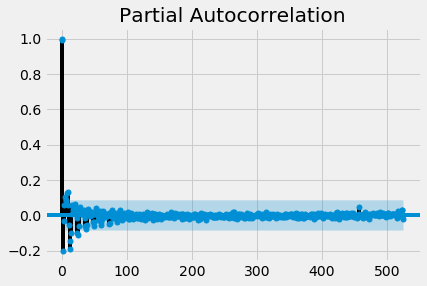

In [7]:
statsmodels.graphics.tsaplots.plot_pacf(y)
plt.show()

## Part II: Data Pre-processing

Detrend

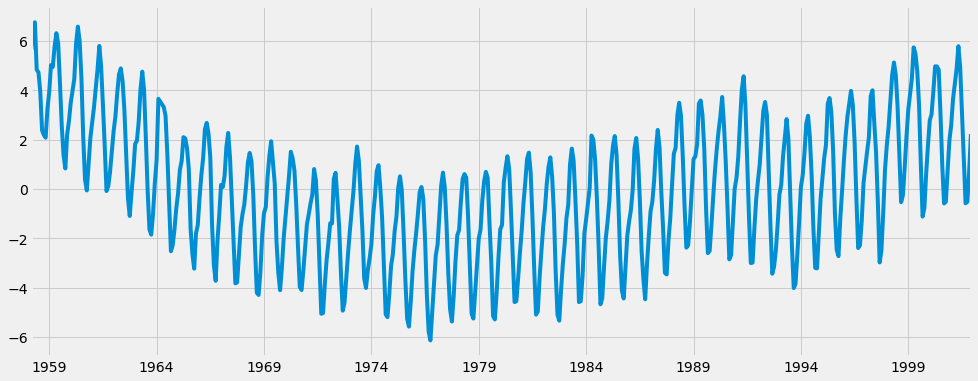

In [8]:
y_detrend = statsmodels.tsa.tsatools.detrend(y)
y_detrend.plot(figsize=(15, 6))
plt.show()

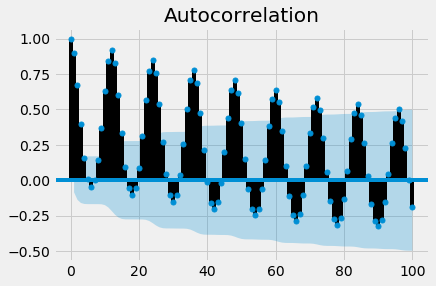

In [9]:
statsmodels.graphics.tsaplots.plot_acf(y_detrend, lags=100)
plt.show()

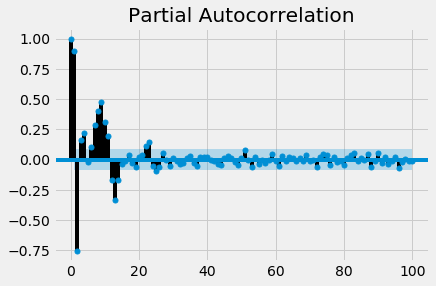

In [10]:
statsmodels.graphics.tsaplots.plot_pacf(y_detrend, lags=100)
plt.show()

Differencing

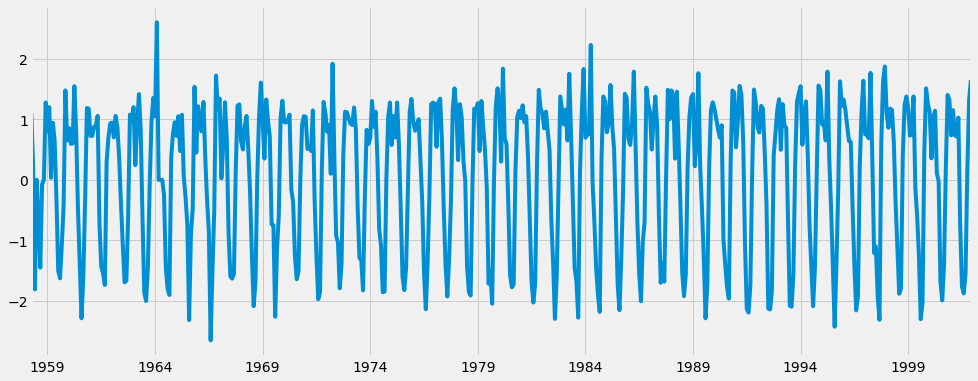

In [11]:
y_dif = statsmodels.tsa.statespace.tools.diff(y)
y_dif.plot(figsize=(15, 6))
plt.show()

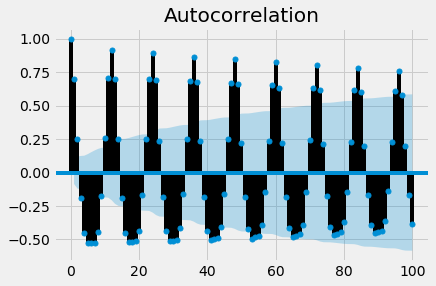

In [12]:
statsmodels.graphics.tsaplots.plot_acf(y_dif, lags=100)
plt.show()

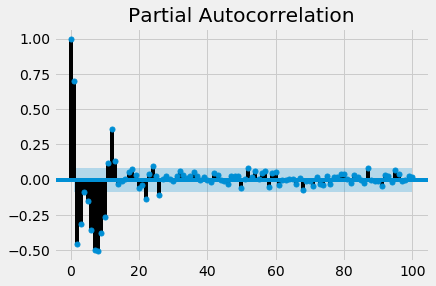

In [13]:
statsmodels.graphics.tsaplots.plot_pacf(y_dif, lags=100)
plt.show()

Log. Doesn't really help in our case though.

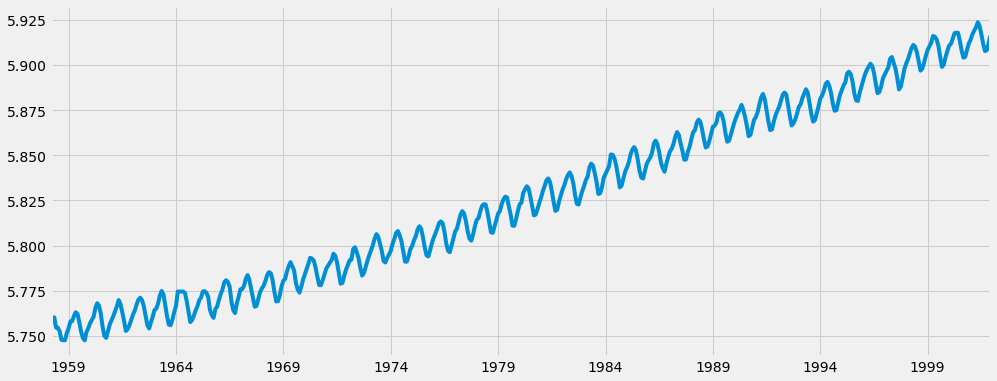

In [14]:
y_log = np.log(y)
y_log.plot(figsize=(15, 6))
plt.show()

## Part III: Fit a Model

Tune hyper-parameters p, d, and q.

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624038269
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727642966
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320024
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878507422859
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791292392
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754608709
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327822983
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067324738
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716900973
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1081.6819216076763
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4315624277713
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893628365
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988183064
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194053
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385497181556
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501757813287
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283759683932


In [28]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3183      0.092      3.444      0.001       0.137       0.499
ma.L1         -0.6255      0.077     -8.168      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.808      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


In-sample Prediction, non-dynamic.

In [18]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

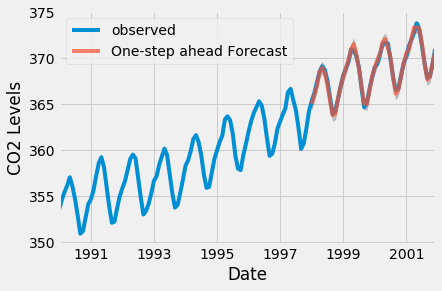

In [19]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 0.07


In-sample Prediction, dynamic.

In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

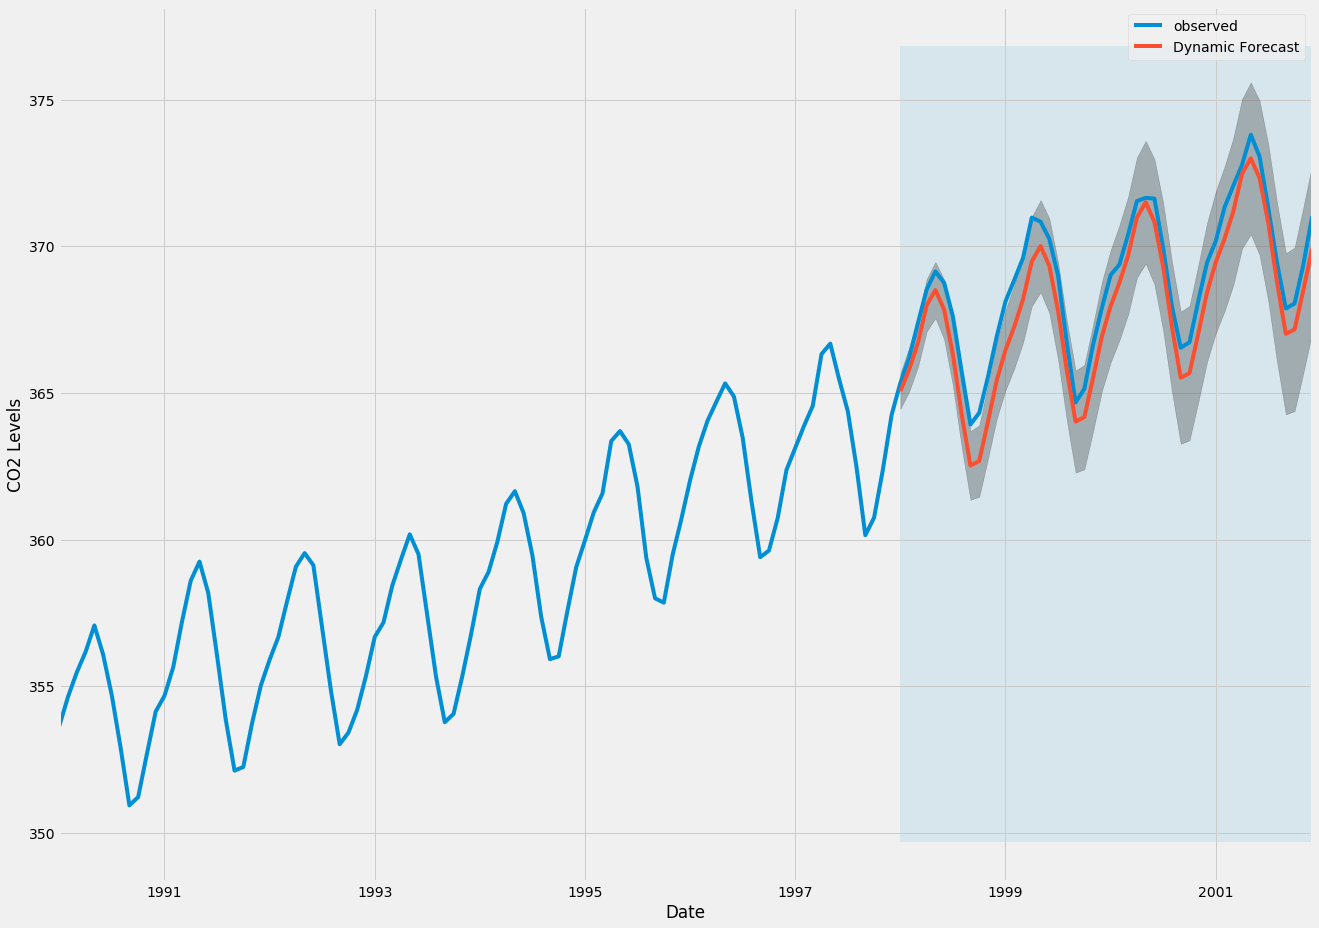

In [22]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [23]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


Out-of-sample Prediction

In [24]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

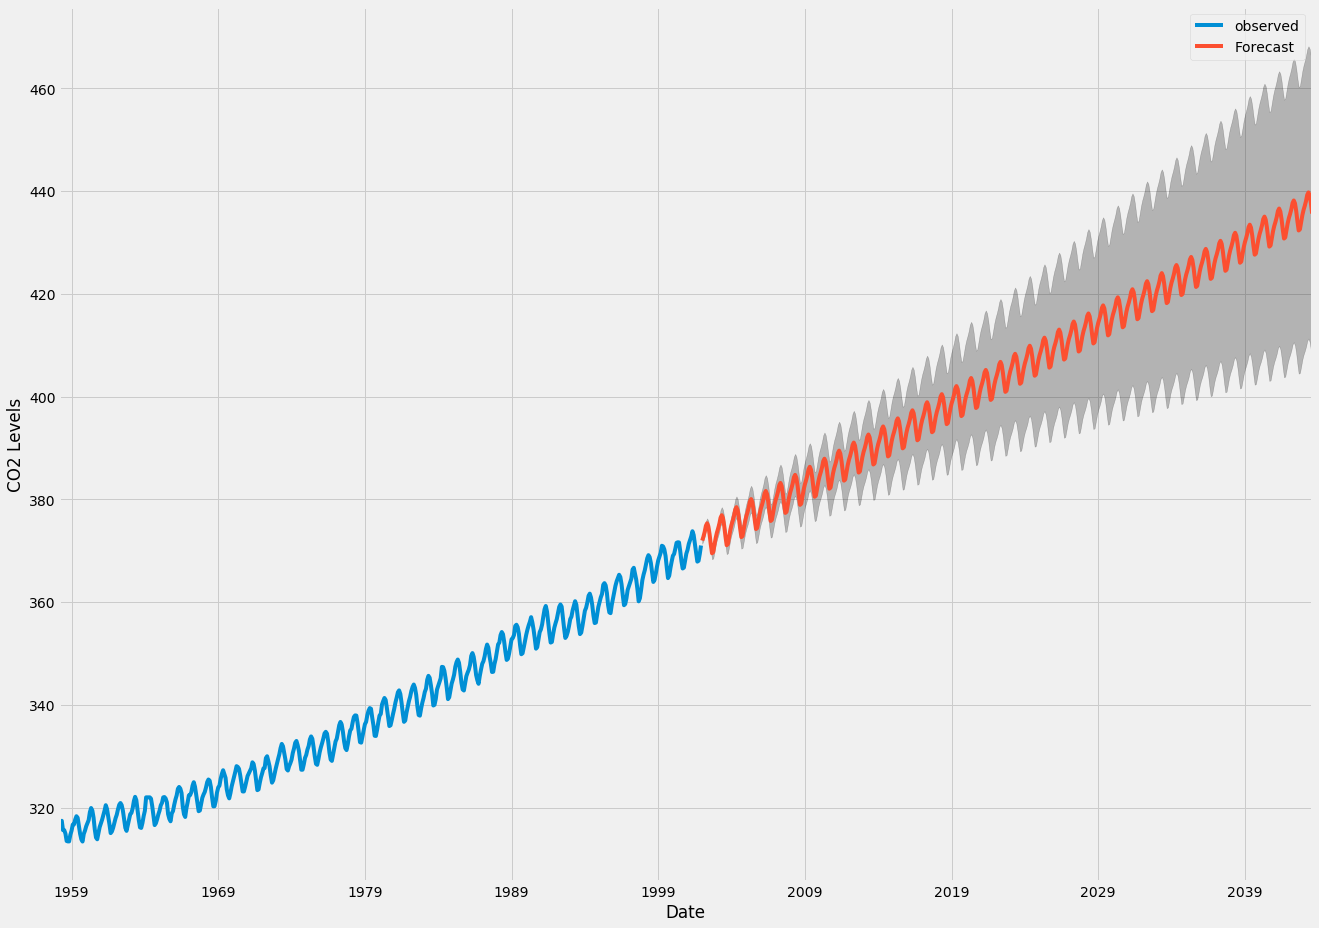

In [25]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

### You don't need to turn in this lab.

### Reference

Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A., http://cdiac.ess-dive.lbl.gov/trends/co2/sio-keel-flask/sio-keel-flaskmlo_c.html

 A Guide to Time Series Forecasting with ARIMA in Python 3, https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
